### Citrus data

Data link: https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('citrus.csv')
df["label"] = (df.name == "orange").astype(int)
df = df.drop(['name'], axis = 1)
X = df.drop("label", axis = 1).values
y = df["label"]

# orange == 1
# grapefruit == 0

In [8]:
df.groupby(y).describe().T

label                     0            1
diameter count  5000.000000  5000.000000
         mean     11.476946     8.474424
         std       1.221148     1.260665
         min       7.630000     2.960000
         25%      10.660000     7.650000
         50%      11.450000     8.470000
         75%      12.320000     9.300000
         max      16.450000    12.870000
weight   count  5000.000000  5000.000000
         mean    197.296664   152.804920
         std      19.193190    18.669021
         min     126.790000    86.760000
         25%     184.350000   140.147500
         50%     197.430000   152.665000
         75%     210.165000   165.430000
         max     261.510000   231.090000
red      count  5000.000000  5000.000000
         mean    150.862800   156.832800
         std      10.103148     9.890258
         min     115.000000   123.000000
         25%     144.000000   150.000000
         50%     151.000000   157.000000
         75%     158.000000   163.000000
         max     187.000000   192.000000
green    count  5000.000000  5000.000000
         mean     70.033000    81.988200
         std      10.044924    10.090789
         min      31.000000    49.000000
         25%      63.000000    75.000000
         50%      70.000000    82.000000
         75%      77.000000    89.000000
         max     103.000000   116.000000
blue     count  5000.000000  5000.000000
         mean     15.611200     7.115200
         std       9.271592     6.493779
         min       2.000000     2.000000
         25%       8.000000     2.000000
         50%      15.000000     4.000000
         75%      22.000000    11.000000
         max      56.000000    38.000000

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

def do_pca(x,n_components=2,**kwargs): 
    pca = PCA(n_components,**kwargs)
    x_trans = pca.fit_transform(x)
    return x_trans


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_small_test = do_pca(X_train,n_components=2)
X_small_train = do_pca(X_test,n_components=2)

In [10]:
pd.DataFrame(X_small).groupby(y).describe().T

label              0            1
0 count  5000.000000  5000.000000
  mean     -1.317466     1.317466
  std       0.917396     0.890476
  min      -4.558456    -1.822839
  25%      -1.947919     0.724459
  50%      -1.312710     1.308873
  75%      -0.680595     1.907904
  max       1.724748     4.924872
1 count  5000.000000  5000.000000
  mean      0.015189    -0.015189
  std       0.966887     0.945506
  min      -3.371306    -3.370996
  25%      -0.629580    -0.662608
  50%       0.001345    -0.013782
  75%       0.668779     0.621292
  max       3.433555     3.636581

In [243]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [323]:
def fit_model(model,param_grid,X_train,y_train,output=True):
    grid_search = GridSearchCV(model,param_grid=param_grid)
    grid_search.fit(X_train,y_train)
    if output:
        for i,j in grid_search.cv_results_.items():
            if "param_" in i or i == "mean_test_score":
                print(i,j)
        print("\n")
    return grid_search

In [161]:
def metric(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

In [150]:
from mlxtend.plotting import plot_decision_regions
def plot_decision(model,X,y,title=""):
    fig, ax = plt.subplots()
    plot_decision_regions(X,y.values,clf=model,legend=2,ax=ax)
    ax.set_title(title)

### KNN Classifier

In [326]:
def fit_knn(X_train,y_train,output=True,param_grid=None):
    knn = KNeighborsClassifier()
    if param_grid is None:
        param_grid = {"n_neighbors":[3,4,5,6],"weights": ['uniform', 'distance']}

    return fit_model(knn,param_grid,X_train,y_train,output)

knn_best = fit_knn(X_train,y_train).best_estimator_
metric(knn_best,X_test,y_test)

param_n_neighbors [3 3 4 4 5 5 6 6]
param_weights ['uniform' 'distance' 'uniform' 'distance' 'uniform' 'distance' 'uniform'
 'distance']
mean_test_score [0.915875 0.9145   0.915875 0.916    0.92075  0.92075  0.9205   0.9195  ]


              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1012
           1       0.92      0.91      0.91       988

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.92      0.91      2000

[[929  83]
 [ 87 901]]


In [327]:
knn_small_best = fit_knn(X_small_train,y_train).best_estimator_

metric(knn_small_best,X_small_test,y_test)

param_n_neighbors [3 3 4 4 5 5 6 6]
param_weights ['uniform' 'distance' 'uniform' 'distance' 'uniform' 'distance' 'uniform'
 'distance']
mean_test_score [0.9125   0.90875  0.912125 0.90825  0.915875 0.913375 0.9175   0.913375]


              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1012
           1       0.93      0.89      0.91       988

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

[[946  66]
 [107 881]]


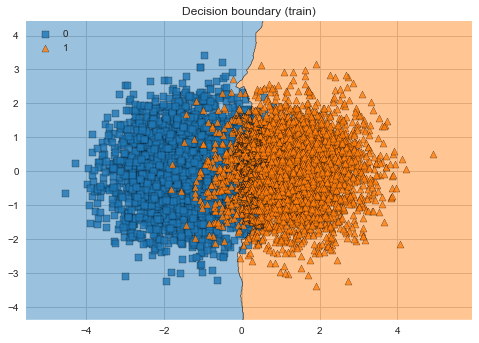

In [168]:
plot_decision(knn_small_best,X_small_train,y_train,title="Decision boundary (train)")

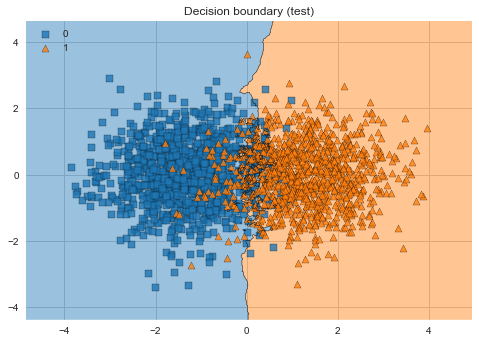

In [169]:
plot_decision(knn_small_best,X_small_test,y_test,title="Decision boundary (test)")

### Naive Bayes

In [336]:
def fit_nb(X_train,y_train,output=True,param_grid=None):
    nb = GaussianNB()
    if param_grid is None:
        param_grid = {}
    return fit_model(nb,param_grid,X_train,y_train,output)


nb_best = fit_nb(X_train,y_train).best_estimator_

metric(nb_best,X_test,y_test)

mean_test_score [0.92275]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1012
           1       0.92      0.91      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

[[934  78]
 [ 86 902]]


In [329]:
nb_small_best = fit_nb(X_small_train,y_train).best_estimator_

metric(nb_small_best,X_small_test,y_test)

mean_test_score [0.929125]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1012
           1       0.92      0.92      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

[[928  84]
 [ 78 910]]


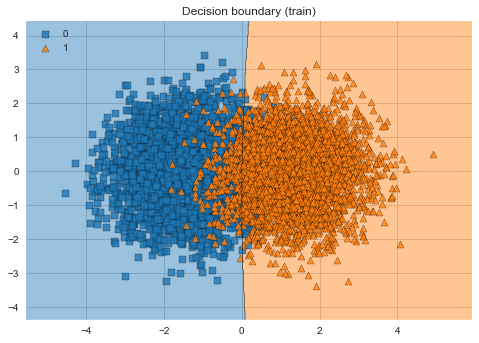

In [330]:
plot_decision(nb_small_best,X_small_train,y_train,title="Decision boundary (train)")

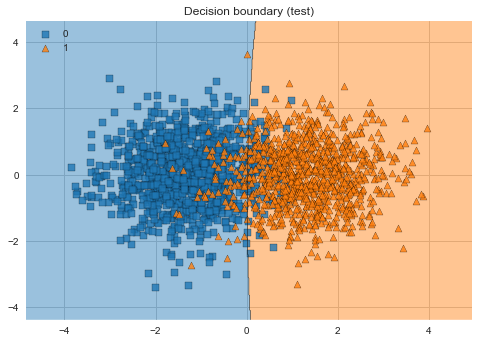

In [318]:
plot_decision(nb_small_best,X_small_test,y_test,title="Decision boundary (test)")

### Decision Tree

In [337]:
def fit_dt(X_train,y_train,output=True,param_grid=None):
    dt = DecisionTreeClassifier()
    if param_grid is None:
        param_grid = {"max_depth":[2,3,4],"min_samples_split":[9,27,81,263]}
    return fit_model(dt,param_grid,X_train,y_train,output)

dt_best = fit_dt(X_train,y_train).best_estimator_

metric(dt_best,X_test,y_test)

param_max_depth [2 2 2 2 3 3 3 3 4 4 4 4]
param_min_samples_split [9 27 81 263 9 27 81 263 9 27 81 263]
mean_test_score [0.88675  0.88675  0.88675  0.88675  0.904625 0.904625 0.904625 0.904625
 0.914625 0.914375 0.91525  0.914375]


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1012
           1       0.93      0.88      0.90       988

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

[[946  66]
 [117 871]]


In [252]:
dt_small_best  = fit_dt(X_small_train,y_train).best_estimator_

metric(dt_small_best,X_small_test,y_test)

param_max_depth [2 2 2 2 3 3 3 3 4 4 4 4]
param_min_samples_split [9 27 81 263 9 27 81 263 9 27 81 263]
mean_test_score [0.927875 0.927875 0.927875 0.927875 0.927875 0.927875 0.927875 0.927875
 0.927    0.927    0.9265   0.92725 ]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1012
           1       0.92      0.92      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

[[928  84]
 [ 77 911]]


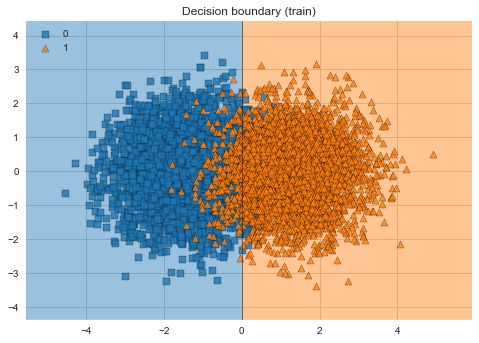

In [191]:
plot_decision(dt_small_best,X_small_train,y_train,title="Decision boundary (train)")

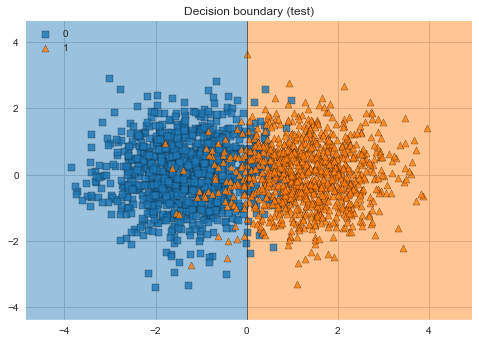

In [189]:
plot_decision(dt_small_best,X_small_test,y_test,title="Decision boundary (test)")

[Text(223.2, 249.15, 'X[0] <= 0.012\ngini = 0.5\nsamples = 8000\nvalue = [3988, 4012]'),
 Text(111.6, 149.49, 'X[0] <= -0.52\ngini = 0.122\nsamples = 3947\nvalue = [3689, 258]'),
 Text(55.8, 49.829999999999984, 'gini = 0.048\nsamples = 3293\nvalue = [3212, 81]'),
 Text(167.39999999999998, 49.829999999999984, 'gini = 0.395\nsamples = 654\nvalue = [477, 177]'),
 Text(334.79999999999995, 149.49, 'X[0] <= 0.459\ngini = 0.137\nsamples = 4053\nvalue = [299, 3754]'),
 Text(279.0, 49.829999999999984, 'gini = 0.451\nsamples = 604\nvalue = [207, 397]'),
 Text(390.59999999999997, 49.829999999999984, 'gini = 0.052\nsamples = 3449\nvalue = [92, 3357]')]

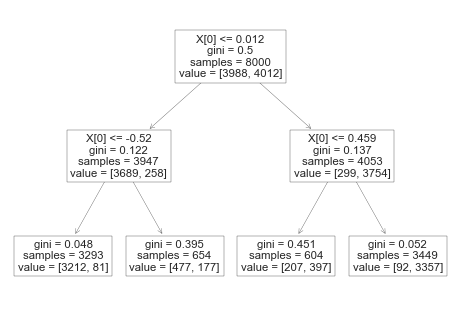

In [208]:
plot_tree(dt_small_best)

### Random forest

In [338]:
def fit_rf(X_train,y_train,output=True,param_grid=None):
    rf = RandomForestClassifier()
    if param_grid is None:
        param_grid = {"max_features":[2,3,4],"min_samples_split":[9,27,81,263],"n_estimators":[200]}
    return fit_model(rf,param_grid,X_train,y_train,output)

dt_best = fit_rf(X_train,y_train).best_estimator_

metric(rf_best,X_test,y_test)

param_max_features [2 2 2 2 3 3 3 3 4 4 4 4]
param_min_samples_split [9 27 81 263 9 27 81 263 9 27 81 263]
param_n_estimators [200 200 200 200 200 200 200 200 200 200 200 200]
mean_test_score [0.9495   0.9445   0.93375  0.918625 0.955    0.948875 0.937375 0.923375
 0.95675  0.949125 0.938125 0.922625]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1012
           1       0.95      0.94      0.95       988

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

[[968  44]
 [ 63 925]]


In [254]:
rf_small_best = fit_rf(X_small_train,y_train, param_grid = {"max_features":[1,2],
                                                            "min_samples_split":[9,27,81,263],
                                                            "n_estimators":[200]}).best_estimator_

metric(rf_small_best,X_small_test,y_test)

param_max_features [1 1 1 1 2 2 2 2]
param_min_samples_split [9 27 81 263 9 27 81 263]
param_n_estimators [200 200 200 200 200 200 200 200]
mean_test_score [0.921125 0.925375 0.927    0.928625 0.92225  0.92525  0.9275   0.928125]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1012
           1       0.92      0.92      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

[[929  83]
 [ 79 909]]


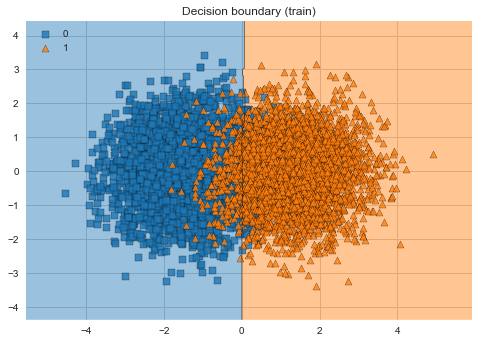

In [315]:
plot_decision(rf_small_best,X_small_train,y_train,title="Decision boundary (train)")

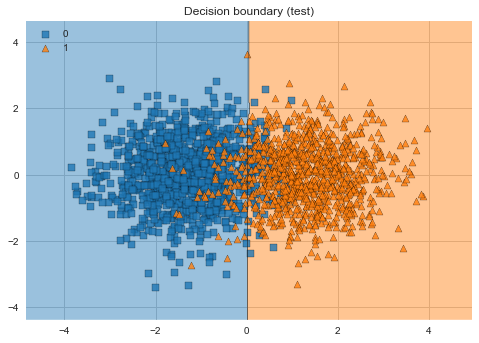

In [227]:
plot_decision(rf_small_best,X_small_test,y_test,title="Decision boundary (test)")

### Classification evaluation

In [273]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [442]:
def cross_validation_ROC_AUC(models,names,X_train,y_train):
    for i,j in zip(models,names):
        y_proba = cross_val_predict(i,X_train,y_train,method="predict_proba")
        fpr, tpr, _ = roc_curve(y_train, y_proba[:,1])
        auc = round(roc_auc_score(y_train, y_proba[:,1]),2)
        plt.plot(fpr,tpr,label=j+" AUC="+str(auc))
        y_pred = cross_val_predict(i,X_train,y_train) 
        print(j)
        print(classification_report(y_train,y_pred))
        print("\n")
    plt.legend()

In [430]:
def cross_validation_accuracy(models,names,X_train,y_train):
    fig, ax = plt.subplots()
    x = 0
    for i,j in zip(models,names):
        scores = cross_val_score(i,X_train,y_train)
        mean = np.mean(scores)
        sd = np.sqrt(np.var(scores))
        ax.errorbar(x, mean, yerr=sd,fmt="o",label=j,markersize=12)
        x = x + 1 
    ax.axes.get_xaxis().set_ticks([])
    plt.legend()

In [439]:
def holdout_ROC_AUC(names,functions,X_train,y_train,param_grids=None):
    fig, ax = plt.subplots()
    x = 0
    X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size = 0.20, random_state = 0)
    for i,j,k in zip(names,functions,param_grids):
        best_model = j(X_train,y_train,param_grid=k,output=False).best_estimator_
        y_proba = best_model.predict_proba(X_validate)
        fpr, tpr, _ = roc_curve(y_validate, y_proba[:,1])
        auc = round(roc_auc_score(y_validate, y_proba[:,1]),2)
        plt.plot(fpr,tpr,label=i+" AUC="+str(auc))
        print(i)
        print(classification_report(y_validate,best_model.predict(X_validate)))
        print("\n")
    plt.legend()
 

In [432]:
models_small = [knn_small_best,nb_small_best,dt_small_best,rf_small_best]
models = [knn_best,nb_best,dt_best,rf_best]
names = ["KNN","Naive Bayes","Decision Tree","Random Forest"]
functions = [fit_knn,fit_nb,fit_dt,fit_rf]

KNN
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3988
           1       0.92      0.92      0.92      4012

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3988
           1       0.92      0.92      0.92      4012

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3988
           1       0.96      0.95      0.96      4012

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0

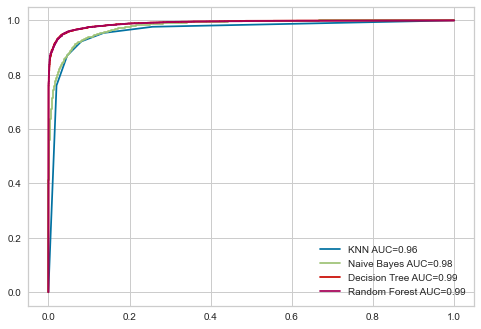

In [443]:
cross_validation_ROC_AUC(models,names,X_train,y_train)

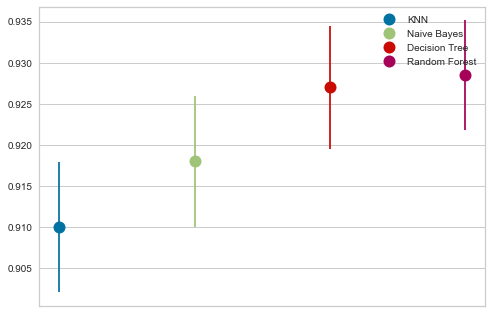

In [417]:
cross_validation_accuracy(models,names,X_test,y_test)

KNN
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       819
           1       0.94      0.90      0.92       781

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       819
           1       0.92      0.92      0.92       781

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       819
           1       0.93      0.90      0.92       781

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0

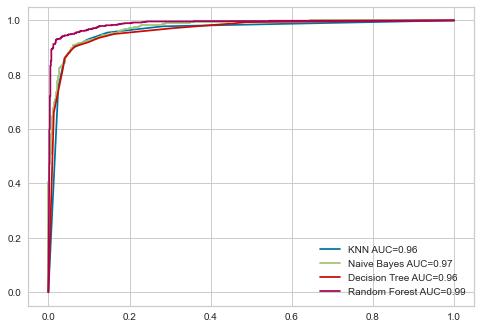

In [446]:
holdout_ROC_AUC(names,functions,X_train,y_train,[None,None,None,None])

KNN
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3988
           1       0.93      0.90      0.92      4012

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3988
           1       0.93      0.93      0.93      4012

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000



Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3988
           1       0.93      0.93      0.93      4012

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0

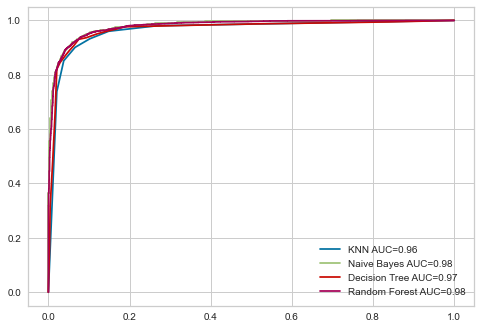

In [447]:
cross_validation_ROC_AUC(models_small,names,X_small_train,y_train)

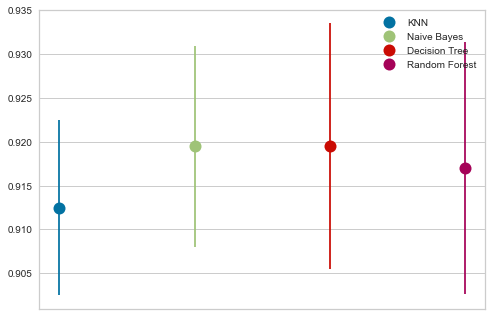

In [448]:
cross_validation_accuracy(models_small,names,X_small_test,y_test)

KNN
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       819
           1       0.93      0.90      0.91       781

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       819
           1       0.92      0.92      0.92       781

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       819
           1       0.91      0.93      0.92       781

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0

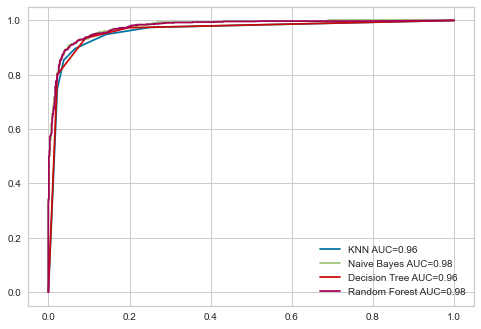

In [444]:
param_grids = [None,None,None,{"max_features":[1,2], "min_samples_split":[9,27,81,263],
                                                                     "n_estimators":[200]}]
holdout_ROC_AUC(names,functions,X_small_train,y_train, param_grids)